2023-07-04 11:20:29.381767
Epoch 1/15
11/11 - 1s - loss: 0.0952 - 1s/epoch - 130ms/step
Epoch 2/15
11/11 - 1s - loss: 0.0629 - 591ms/epoch - 54ms/step
Epoch 3/15
11/11 - 1s - loss: 0.0580 - 598ms/epoch - 54ms/step
Epoch 4/15
11/11 - 0s - loss: 0.0554 - 498ms/epoch - 45ms/step
Epoch 5/15
11/11 - 1s - loss: 0.0552 - 501ms/epoch - 46ms/step
Epoch 6/15
11/11 - 1s - loss: 0.0552 - 599ms/epoch - 54ms/step
Epoch 7/15
11/11 - 1s - loss: 0.0559 - 796ms/epoch - 72ms/step
Epoch 8/15
11/11 - 0s - loss: 0.0562 - 496ms/epoch - 45ms/step
Epoch 9/15
11/11 - 1s - loss: 0.0578 - 799ms/epoch - 73ms/step
Epoch 10/15
11/11 - 1s - loss: 0.0544 - 704ms/epoch - 64ms/step
Epoch 11/15
11/11 - 0s - loss: 0.0532 - 306ms/epoch - 28ms/step
Epoch 12/15
11/11 - 1s - loss: 0.0538 - 797ms/epoch - 72ms/step
Epoch 13/15
11/11 - 1s - loss: 0.0536 - 702ms/epoch - 64ms/step
Epoch 14/15
11/11 - 1s - loss: 0.0545 - 792ms/epoch - 72ms/step
Epoch 15/15
11/11 - 1s - loss: 0.0531 - 604ms/epoch - 55ms/step
it took 0:00:10.779191 (

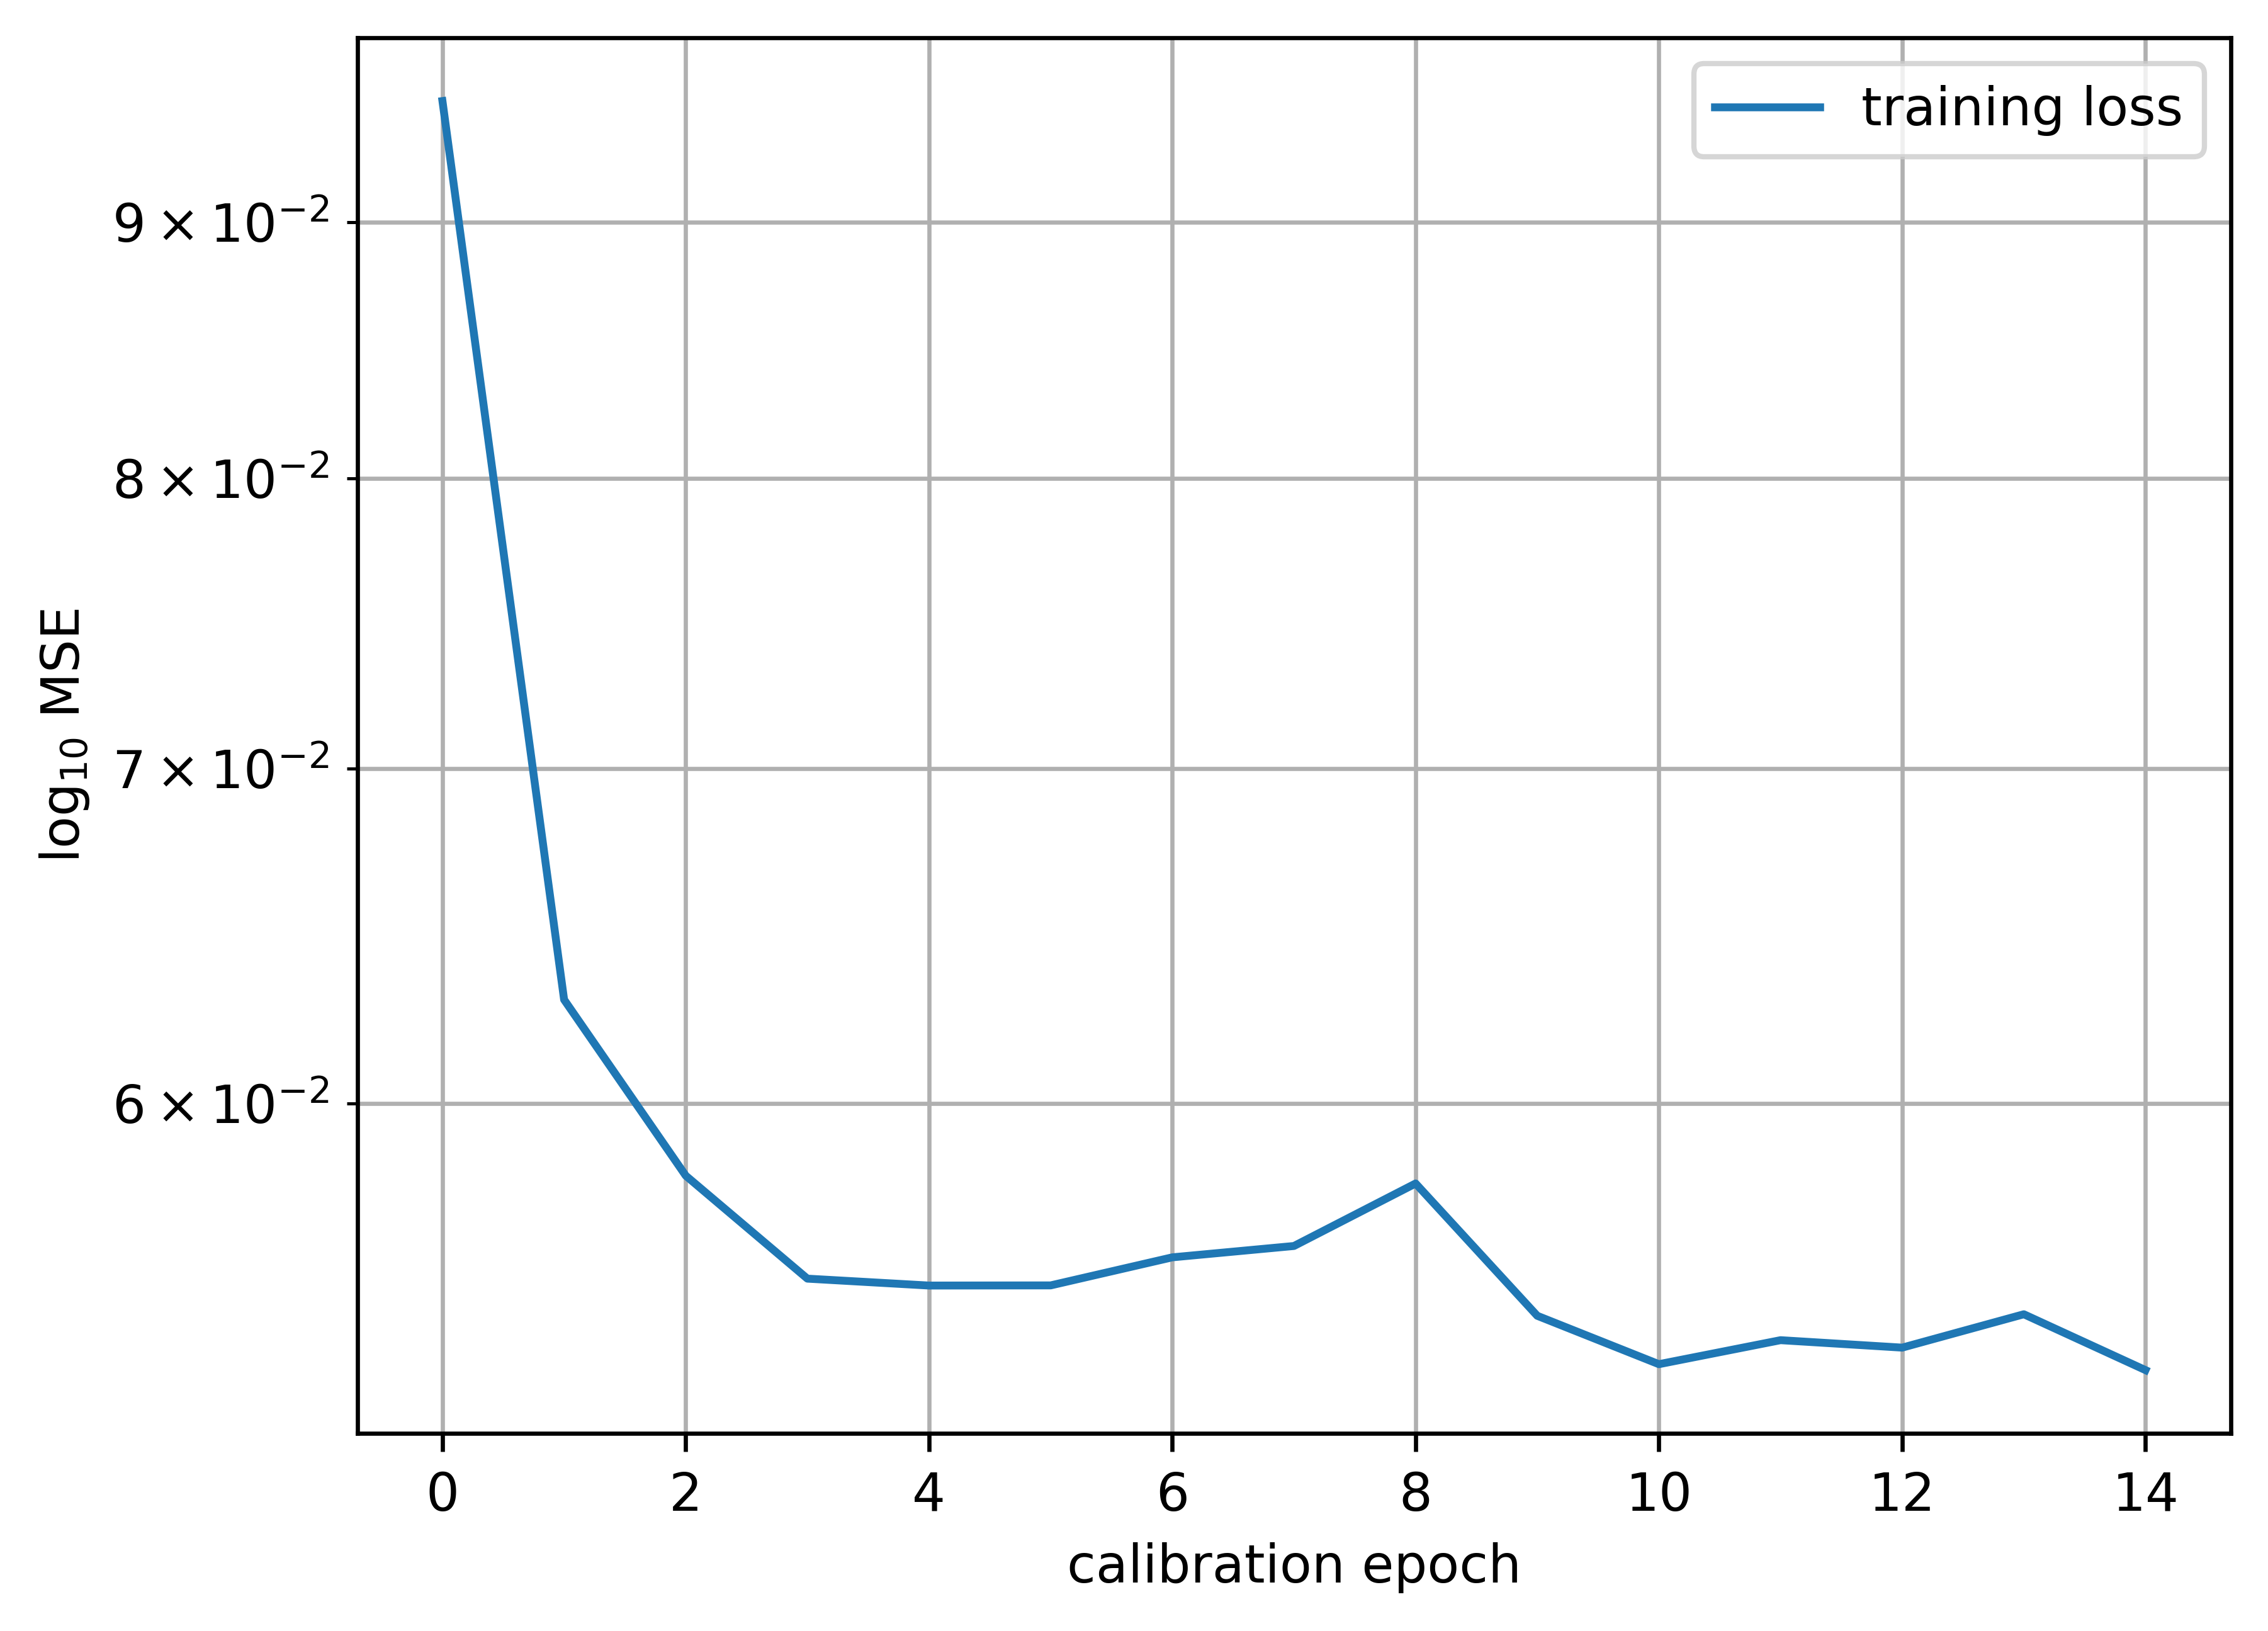

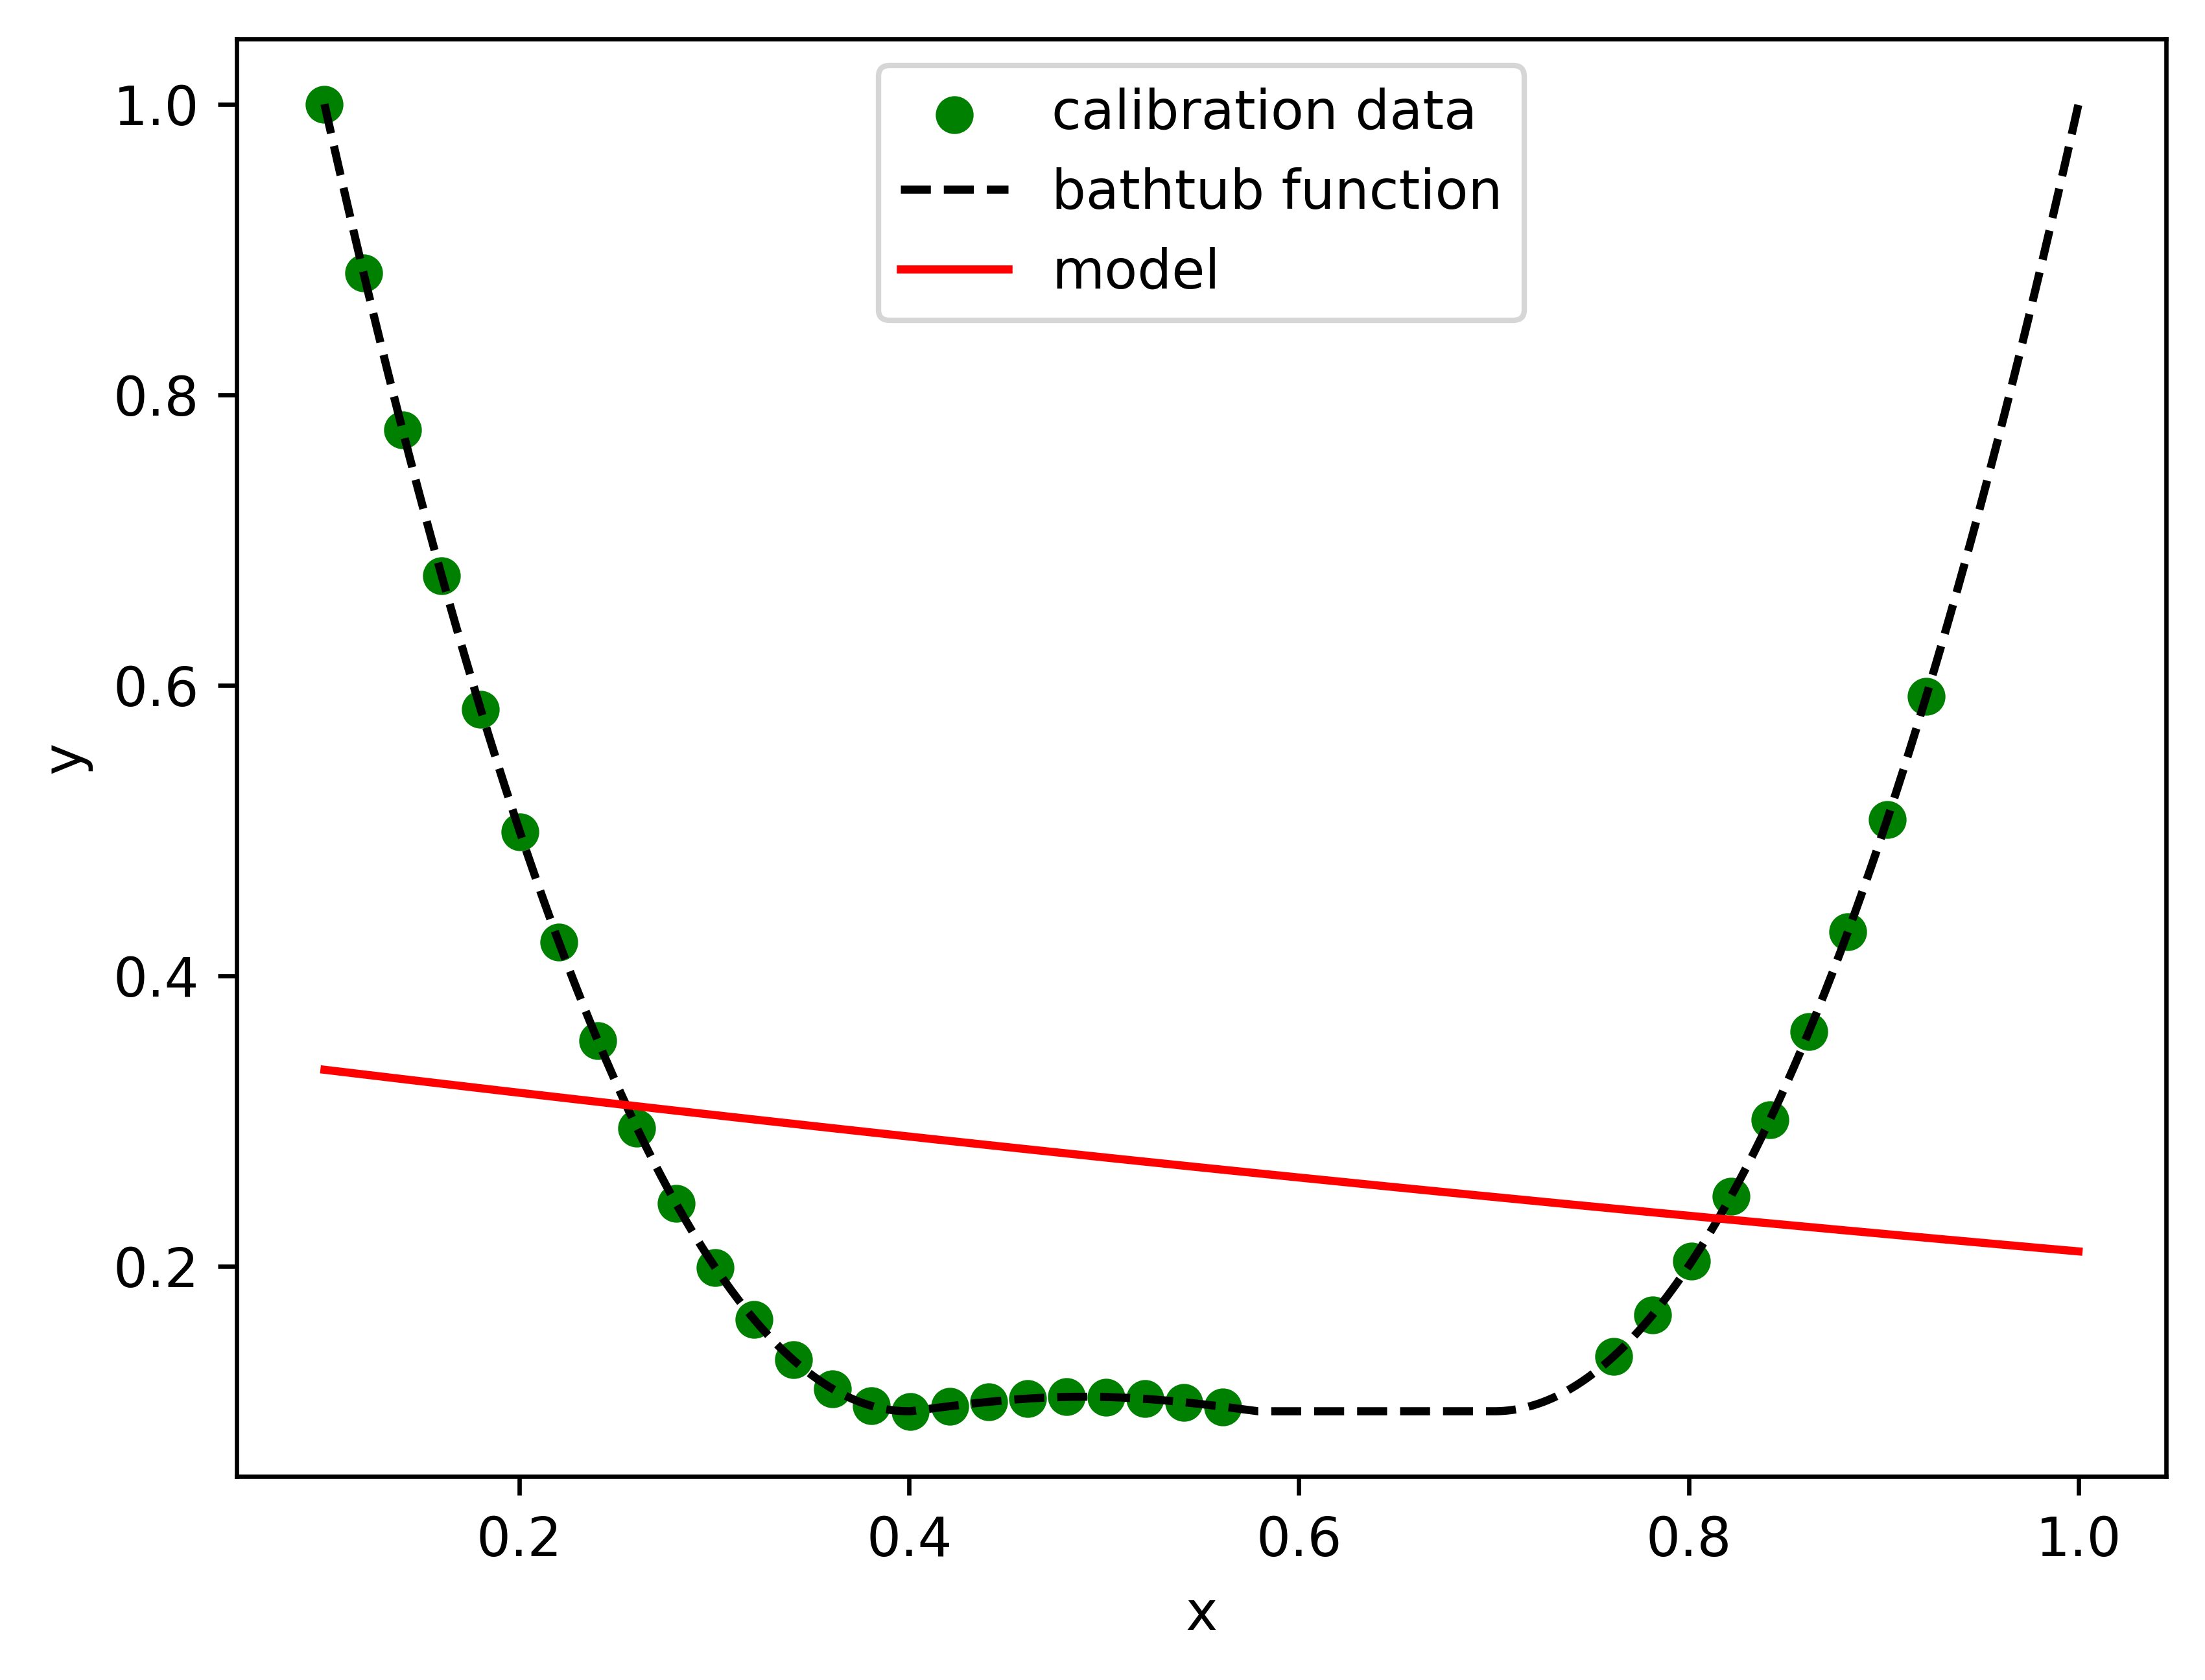

In [2]:
"""
Tutorial Machine Learning in Solid Mechanics (WiSe 22/23)
Task 1: Feed-Forward Neural Networks

==================

Authors: Dominik K. Klein
         
08/2022
"""


# %%   
"""
Import modules

"""
from matplotlib import pyplot as plt
import tensorflow as tf
import datetime
now = datetime.datetime.now

# %% Own modules
import data as ld
import models as lm



# %%   
"""
Load model

"""

model = lm.main()


# %%   
"""
Load data

"""

xs, ys, xs_c, ys_c = ld.bathtub()

# %%   
"""
Model calibration

"""

t1 = now()
print(t1)

tf.keras.backend.set_value(model.optimizer.learning_rate, 0.002)
h = model.fit([xs_c], [ys_c], epochs = 15,  verbose = 2)

t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')

# plot some results
plt.figure(1, dpi=600)
plt.semilogy(h.history['loss'], label='training loss')
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('log$_{10}$ MSE')
plt.legend()


# %%   
"""
Evaluation

"""

plt.figure(2, dpi=600)
plt.scatter(xs_c[::10], ys_c[::10], c='green', label = 'calibration data')
plt.plot(xs, ys, c='black', linestyle='--', label='bathtub function')
plt.plot(xs, model.predict(xs), label='model', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



